# Dry Bean Data Classification Project


### INTRODUCTION:
In this project there are seven Classes of dry beans and the Primary aim of this study is to provide a method to obtain uniform 
seed varieties by using machine learning algorithms to classify them with better accuracy than the existing one. The exsisting 
accuracy persormance is 93.3%. Using different machine learning techniques we aimed to increase the accuracy performancy. 


Group Members: Tiru Wube,Goutham kakani,Chetan Desai

In [ ]:
#Imported the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold


# 1. Exploratory Data Analysis

In [ ]:
#The URL link to read the data set from
url = "https://drive.google.com/uc?export=download&id=1zmjnJv5n5ZLVQUlZ95MdrjYzCPwtSkjE"
Bean_df = pd.read_excel(url)
Bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#data type of the features in data set
Bean_df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
#To know the number of samples and features
Bean_df.shape

(13611, 17)

In [ ]:
Bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
#import seaborn as sns
#sns.set_theme(style="ticks")


#_=sns.pairplot(df2, hue="Class")

Imported the seaborn plot from the google drive by uploading it, as it saves some execution time.The syntax to add in to the google drive is " ![picture]("the shareable link from the google drive"). Make sure the view axis is granted before it is being used.

![picture](https://drive.google.com/uc?export=download&id=1uF86zdai8L6znvqDFcQs-uDI_gBx1sbk)

In [ ]:
#Finding the duplicate rows in the data set
duplicate_rows_df = Bean_df[Bean_df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)



number of duplicate rows: (68, 17)


In [ ]:

duplicate_rows_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136539,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


In [ ]:
#dropping the duplicate rows and storing it into new data frame
Bean_df = Bean_df.drop_duplicates()
Bean_df.count()

Area               13543
Perimeter          13543
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         13543
EquivDiameter      13543
Extent             13543
Solidity           13543
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class              13543
dtype: int64

In [ ]:
#Check for null values if any
print(Bean_df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [ ]:
# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
Bean_df['Class_enco'] = class_le.fit_transform(Bean_df['Class'].values)
Bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_enco
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5


The technique to find outliers and remove we referred 
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

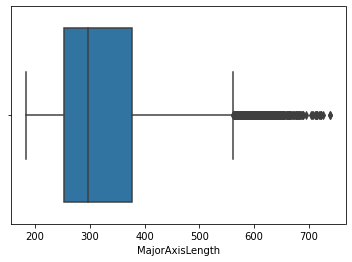

In [ ]:
#Box plots to visualize the data points and to check the outliers

sns.boxplot(x=Bean_df['MajorAxisLength'])


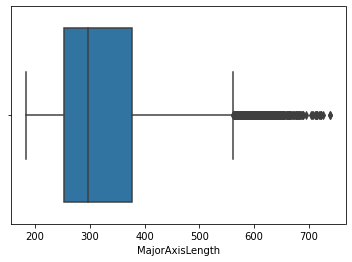

In [ ]:

sns.boxplot(x=Bean_df['MajorAxisLength'])

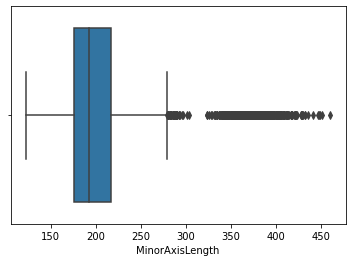

In [ ]:

sns.boxplot(x=Bean_df['MinorAxisLength'])

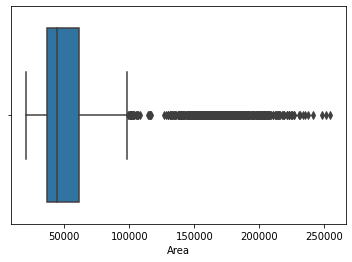

In [ ]:

sns.boxplot(x=Bean_df['Area'])

From the Above plots, there are  some outliers in the data.Inorder to remove them from the data we used Interquartile range to get reliable data without Outliers. As most of the outliers are present at the extream end of the fourth quartile, we modified the range of inclusion for the formula below which suits our data well.

In [ ]:
Q1 = Bean_df.quantile(0.02)
Q3 = Bean_df.quantile(0.85)
IQR = Q3-Q1
print(IQR)

Area               46795.860000
Perimeter            458.883760
MajorAxisLength      184.662289
MinorAxisLength       89.310450
AspectRation           0.658482
Eccentricity           0.324575
ConvexArea         47732.820000
EquivDiameter        123.099552
Extent                 0.180900
Solidity               0.016991
roundness              0.188432
Compactness            0.186510
ShapeFactor1           0.004219
ShapeFactor2           0.001592
ShapeFactor3           0.287596
ShapeFactor4           0.015722
Class_enco             6.000000
dtype: float64


In [ ]:
#New dataframe after removing the outliers Using modified IQR
df = Bean_df[~((Bean_df < (Q1-1.5 * IQR)) |(Bean_df > (Q3+1.5 * IQR))).any(axis=1)]
df.shape

(13054, 18)

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_enco
count,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000,13054.000000
mean,48517.645243,827.537513,309.579727,195.979479,1.580339,0.749377,49173.893672,244.956439,0.748909,0.987202,0.874201,0.800796,0.006676,0.001752,0.645151,0.995240,3.622338
std,17248.745765,161.778185,67.462014,30.479859,0.248642,0.093105,17568.784270,42.083999,0.048903,0.004470,0.060054,0.062265,0.000973,0.000580,0.099933,0.004133,1.800817
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.949103,0.556766,0.640577,0.003502,0.000751,0.410339,0.960702,0.000000
25%,36008.250000,700.010250,251.800480,175.074614,1.426776,0.713279,36404.750000,214.119424,0.717729,0.985726,0.832013,0.762822,0.006028,0.001205,0.581897,0.993954,3.000000
50%,43877.000000,785.981000,292.818856,191.465755,1.547513,0.763170,44403.000000,236.359750,0.758843,0.988296,0.885278,0.802357,0.006678,0.001733,0.643777,0.996496,3.000000
75%,58478.000000,955.304000,369.578924,211.973286,1.706244,0.810251,59309.000000,272.867187,0.786123,0.990009,0.918159,0.835673,0.007304,0.002194,0.698349,0.997936,5.000000
max,142399.000000,1459.686000,540.677823,364.519023,2.430306,0.911423,143783.000000,425.802816,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


In [ ]:
#plt.figure(figsize=(20,10))
#c= df.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)

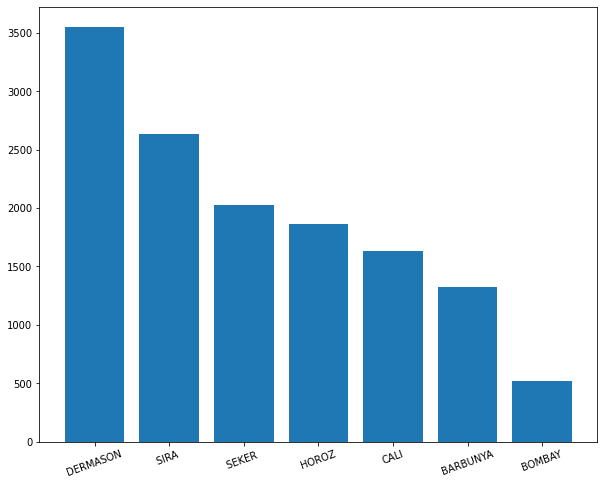

In [ ]:
#Bar graph plot to display the distribution of individual classes 

Bean_df.Class.value_counts()

plt.figure(figsize=(10,8))
classes =np.arange(7)
X_ticks = ["DERMASON","SIRA ","SEKER ","HOROZ","CALI","BARBUNYA", "BOMBAY"]

plt.bar(classes, Bean_df['Class'].value_counts())
plt.xticks(classes,X_ticks, rotation=20)
plt.show()

 As we see from the above graph the classes are Imbalanced, We will use SMOTE method in the next step to balance the classes.


In [ ]:
# Loading all the feature values in a variable X, and the target values assigned to  y.
X= Bean_df.iloc[:,:-2]
X.head()
y=Bean_df.iloc[:,-1]

In [ ]:
# Balance the classes using SMOTE method

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

In [ ]:
X_sm.shape

(24822, 16)

In [ ]:
print("number of y",np.bincount(y_sm))

number of y [3546 3546 3546 3546 3546 3546 3546]


# 2. Model Training and Predicting 

In [ ]:
#splitting dataset into train and test data with 80% and 20% respectively.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X_sm, y_sm, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y_sm)

In [ ]:
print("number of y",np.bincount(y_sm))
print("number of y_train",np.bincount(y_train))
print("number of y_test",np.bincount(y_test))

number of y [3546 3546 3546 3546 3546 3546 3546]
number of y_train [2837 2837 2837 2837 2836 2836 2837]
number of y_test [709 709 709 709 710 710 709]


In [ ]:
#splitting the train dataset into validation and train data with 80% and 20% respectively
X_train2, X_validation, y_train2, y_validation =\
    train_test_split(X_train, y_train, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y_train)

In [ ]:
print("number of y",np.bincount(y_train))
print("number of y_train2",np.bincount(y_train2))
print("number of y_validation",np.bincount(y_validation))

number of y [2837 2837 2837 2837 2836 2836 2837]
number of y_train2 [2269 2269 2270 2269 2269 2269 2270]
number of y_validation [568 568 567 568 567 567 567]


In [ ]:
# standerdizing all the features of data set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train2)
X_train_std = sc.transform(X_train2)
X_test_std = sc.transform(X_test)
X_val_std = sc.transform(X_validation)

In [ ]:
# For visualization purpose we used only two X features, MajorAxisLength and ShapeFactor3 


X_two_feat= (X_train_std[:,[2,14]])
X_two_val= (X_val_std[:,[2,14]])
#X_two_feat.shape

we built several models and compared their accuracy performance to choose the best model to classify the seven dry bean classes.

## 2.1 Perceptron

In [ ]:
from sklearn.linear_model import SGDClassifier

clf= SGDClassifier(loss="perceptron", eta0=0.001,max_iter=1000,learning_rate="constant", penalty=None)

clf.fit(X_train_std,y_train2)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# A Function to creat a decsion region for separating bean classesinto seven categories using two of X features
def plot_decision_regions(X, y, classifier, resolution=0.02, margin=1):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v','<','>')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan','yellow','pink')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    x2_min, x2_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
# # The classes are not well separeted by perceptron
# plt.figure(figsize=(8,6))
# plot_decision_regions(X_two_feat, y_train2, classifier=clf)
# plt.xlabel("MajorAxisLength")
# plt.ylabel("ShapeFactor3")

# plt.title('Major Axis Length vs Shape Factor3 by Perceptron')
# plt.legend(loc='upper left')
# plt.show()

 Major Axis length and Shape Factor3 where only used for drafting decision region



![picture](https://drive.google.com/uc?export=download&id=1ZVzZIXqCTEIhV7qtwp5AbvSjZ7ev9v-T)


In [ ]:
#Accuracy for perceptron, which is not high enough.
from sklearn.metrics import accuracy_score
yhat = clf.predict(X_val_std)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.917


## 2.2 Logistic Regression

In [ ]:
# Logistic regression for multi class classification 
lr= LogisticRegression(max_iter=1000,random_state=0,solver='lbfgs').fit(X_train_std,y_train2)

In [ ]:
# Accuracy of Logistic regeression, It is fair but it is not high enough
yhat = lr.predict(X_val_std)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.938


## 2.3 Support Vector Machine

In [ ]:
# SVM with C value 100 and linear kerenel 
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100, random_state=1)
svm.fit(X_train_std,y_train2)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Accuracy of SVM for linear kerenel, it is fair but it is not high enough 
yhat = svm.predict(X_val_std)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.943


In [ ]:
# plt.figure(figsize=(10,6))
# plot_decision_regions(X_two_feat, 
#                       y_train2,
#                       classifier=svm)

# plt.xlabel("MajorAxisLength")
# plt.ylabel("ShapeFactor3")

# plt.title('Major Axis Length vs Shape Factor3 by SVM')
# plt.legend(loc='upper right')
# plt.show()

# plt.show()

![picture](https://drive.google.com/uc?export=download&id=19NLPkiBvXALHL_DNfnIEqaeTsVo2ZnBF)


## 2.4 Non-Linear SVM

In [ ]:
# SVM with nonlinear kernel for C is 0.1 and gamma is 0.001
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=0.1)
svm.fit(X_train_std, y_train2)



SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Accuracy of nonlinear kernel SVM, is not high enough.
yhat = svm.predict(X_val_std)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.903


In [ ]:
# plt.figure(figsize=(10,8))
# plot_decision_regions(X_two_feat, y_train2,
#                       classifier=svm)
# plt.xlabel("MajorAxisLength")
# plt.ylabel("ShapeFactor3")

# plt.title('Major Axis Length vs Shape Factor3 by Non_Linear SVM')
# plt.legend(loc='upper left')
# plt.show()

# plt.show()

![picture](https://drive.google.com/uc?export=download&id=1sYO_UV1jS_34XZyAiq7uxQg_RjANKcJE)


## 2.5 Decision Tree

In [ ]:
# Decision Tree with depth 8 and criterion is gini

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=8, 
                                    random_state=1)
tree_model.fit(X_train_std, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# plt.figure(figsize=(10,8))
# plot_decision_regions(X_two_feat, y_train2, 
#                       classifier=tree_model)
# plt.xlabel("MajorAxisLength")
# plt.ylabel("ShapeFactor3")

# plt.title('Major Axis Length vs Shape Factor3 by Decision Tree')
# plt.legend(loc='upper left')
# plt.show()

![picture](https://drive.google.com/uc?export=download&id=16yHNsK9EXfuoeU2nE71umMLtK0iu9Lp-)


In [ ]:
# An accuracy for decision tree, It is not high enough
yhat = tree_model.predict(X_val_std)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.927


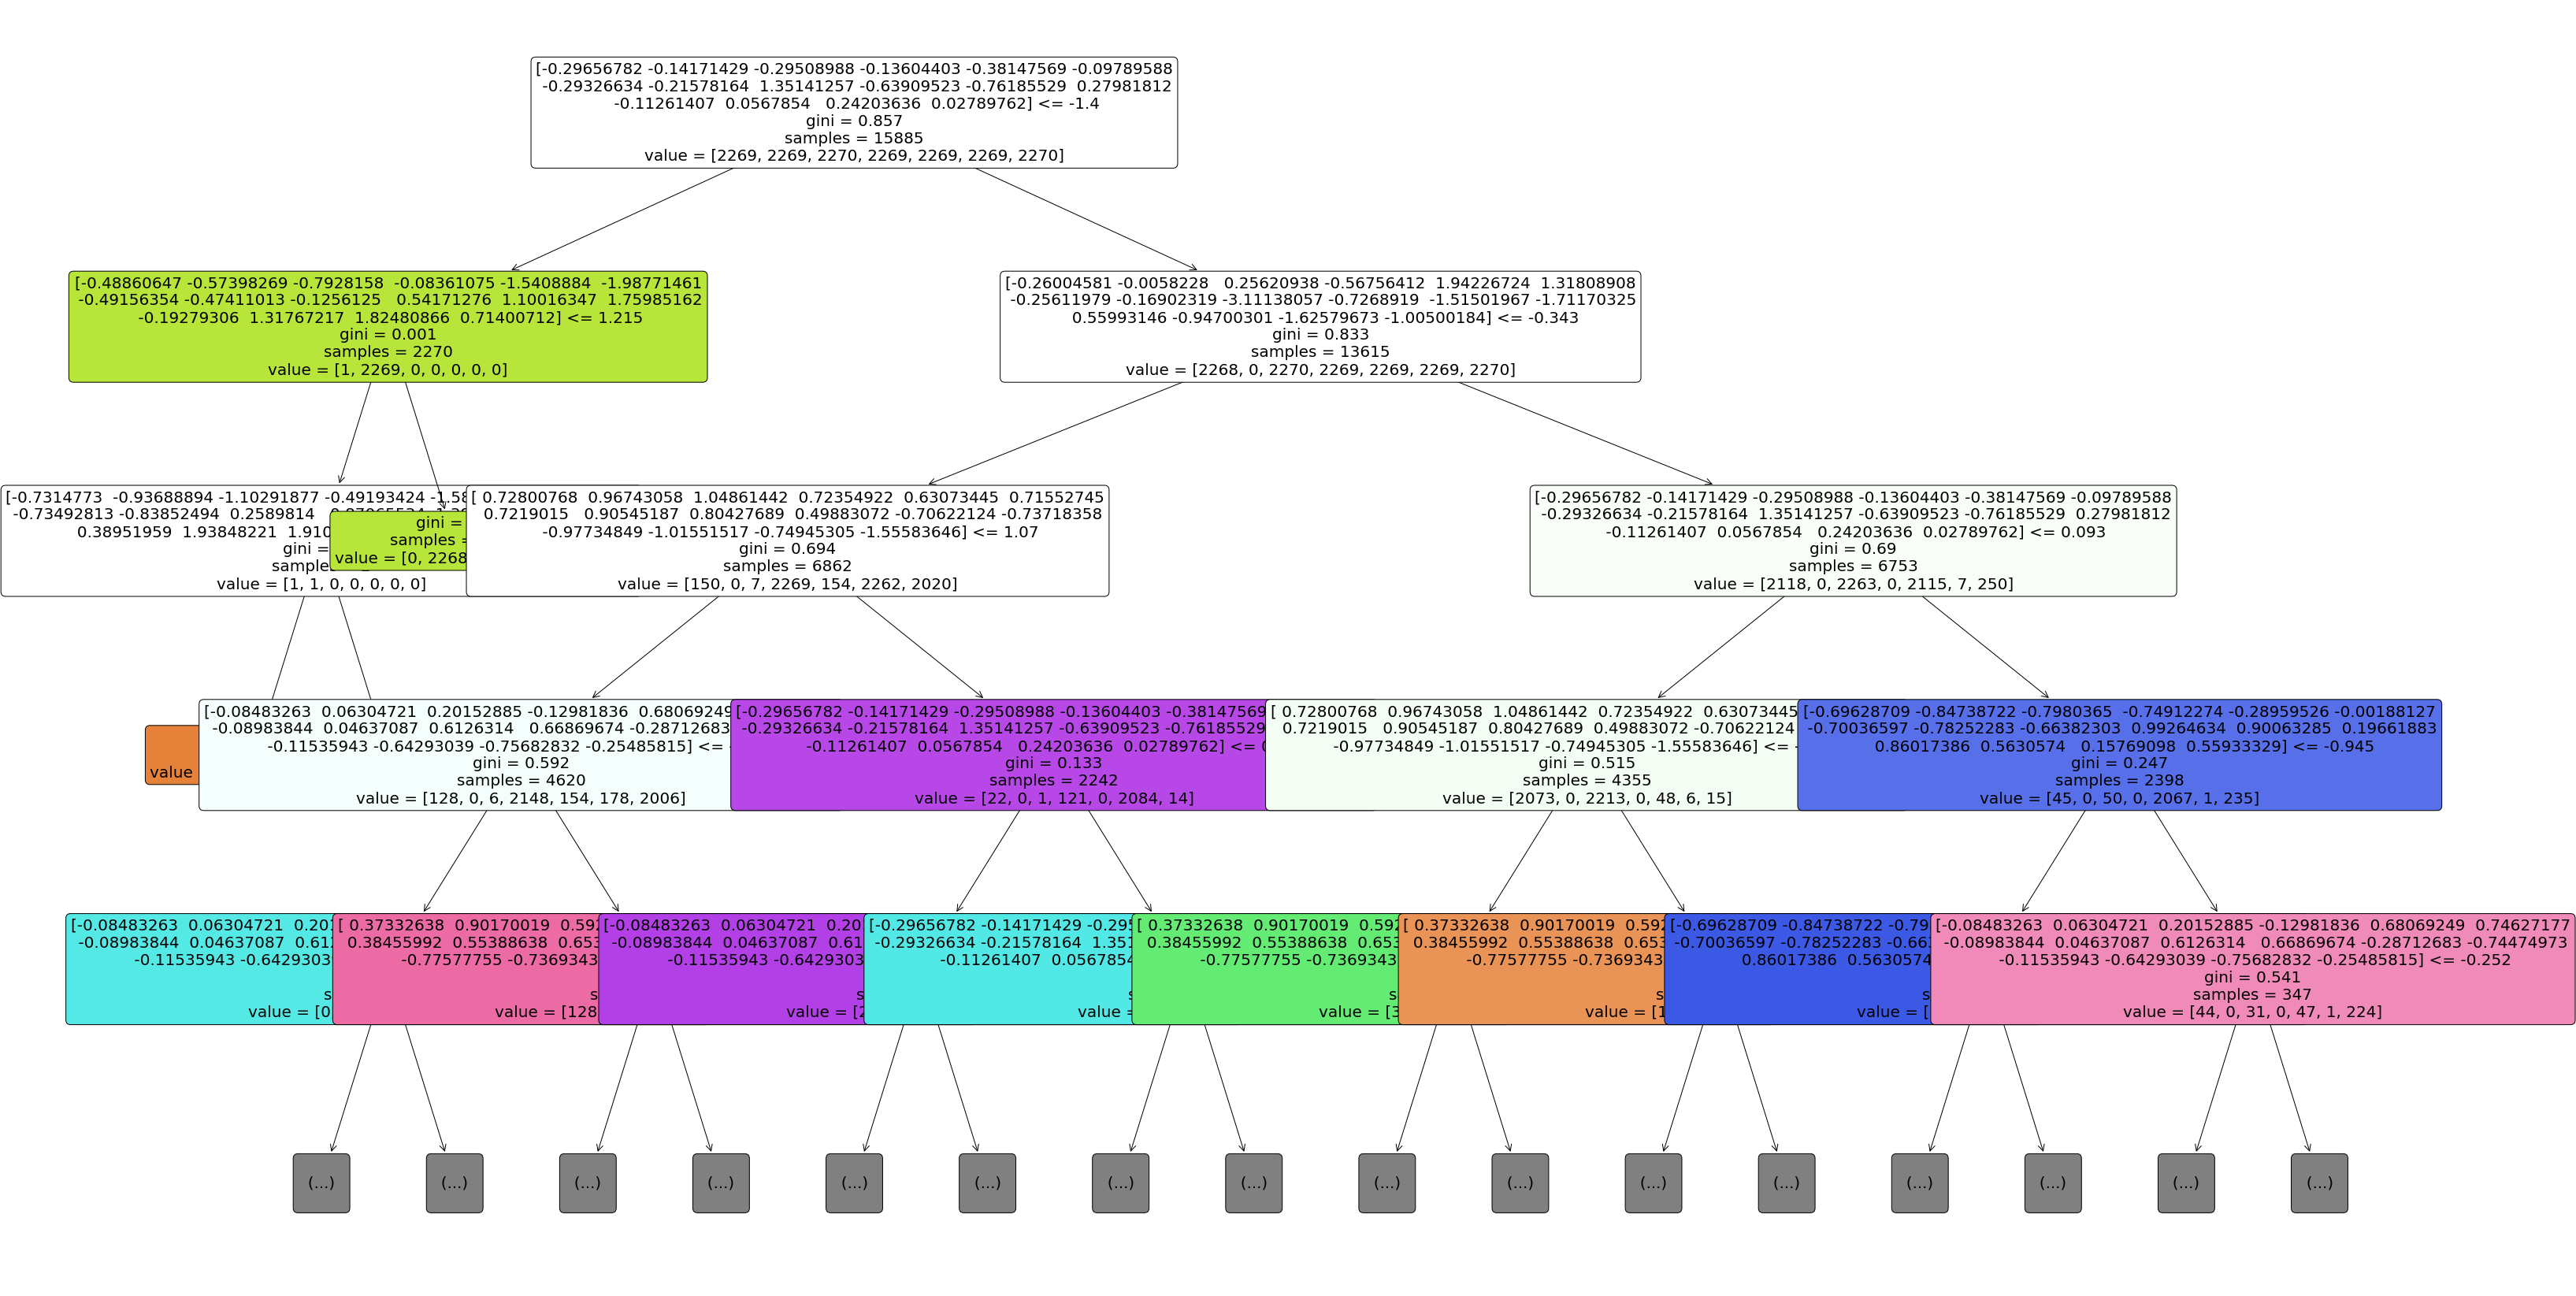

In [ ]:

plt.figure(figsize=(50,30))  
tree.plot_tree(tree_model, feature_names = X_train_std, 
             filled=True, fontsize=20, rounded = True, max_depth = 4)
plt.show()

## 2.6 Feature Transformation with PCA

we have trained some models so far and we haven not gotten high enough accuracy. Thus we have implemented different techinques to improve the accuracy performance.

In [ ]:
# PCA for 2 features 

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.fit_transform(X_val_std)

### 2.6.1 Logistic regression with PCA

In [ ]:
# PCA for logistic regression
lr = LogisticRegression(penalty='l2',multi_class='ovr', max_iter=10000, random_state=1, solver='lbfgs')
                                           
lr = lr.fit(X_train_pca, y_train2)

In [ ]:
# Accuracy for PCA logistic regeression, which is lower than the value without using PCA for logistic regeression
yhat = lr.predict(X_val_pca)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.864


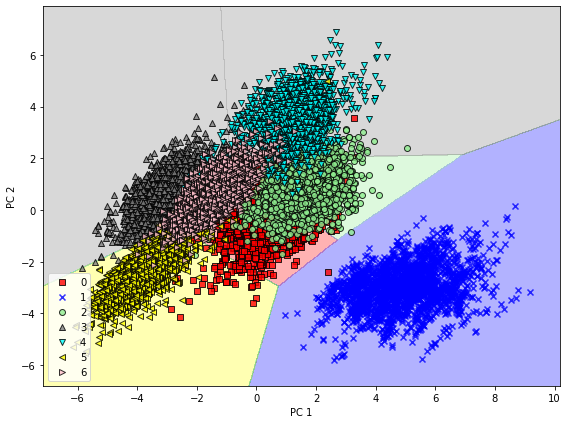

In [ ]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train_pca, y_train2, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 2.6.2 Non-Linear SVM with PCA

In [ ]:
# PCA with nonlinear kernel SVM, with gamma 0.1 and C is 100
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=100)
svm.fit(X_train_pca, y_train2)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# The Accuracy of PCA SVM, the value is lower than the value we used with out PCA
yhat = svm.predict(X_val_pca)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.876


###2.6.3 RandomForest with PCA

In [ ]:
# RandomForest with pca, estimators 30, criterion gini

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=30, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_pca, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#The accuracy of PCA RandomForest, which is not good enough
yhat = forest.predict(X_val_pca)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.859


## 2.7 Ensemble Method (Bagging)

Because of the time constraint we have gone for feature selection in bagging. For feature selection we have used three techniques which are Univarient Selection, Feature Importance and Heat Map.

### 2.7.1 Univarient Selection

In Univarient selection we selected the features that have the strongest relationship between thee output. We have gone for chi-squared staatistical test which gives reliable results on categorical output data as in our case.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x= Bean_df.iloc[:,0:16]
y = Bean_df.iloc[:,-2]

In [ ]:
#apply SelectKBest class to extract top best features
bestfeatures =  SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(x,y)

In [ ]:
dfscores= pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
X = df.iloc[:,0:15] 
y = df.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(14,'Score')

,Specs,Score
6,ConvexArea,7.019972e+07
0,Area,6.846884e+07
1,Perimeter,3.573150e+05
2,MajorAxisLength,1.661935e+05
7,EquivDiameter,8.065242e+04
3,MinorAxisLength,5.050441e+04
4,AspectRation,4.219886e+02
14,ShapeFactor3,1.654969e+02
5,Eccentricity,1.190895e+02
11,Compactness,5.202536e+01


In [ ]:
#print 10 best features
featureScores

,Specs,Score
0,Area,6.846884e+07
1,Perimeter,3.573150e+05
2,MajorAxisLength,1.661935e+05
3,MinorAxisLength,5.050441e+04
4,AspectRation,4.219886e+02
5,Eccentricity,1.190895e+02
6,ConvexArea,7.019972e+07
7,EquivDiameter,8.065242e+04
8,Extent,6.322400e+00
9,Solidity,6.450362e-02


### 2.7.2 Feature Importance

Feature importance gives the score for each feature, the higher the value, more revelant is the feture towards the output. It has an inbuilt class that comes with the tree based classifier.

[0.0593278  0.07754844 0.06929565 0.08467647 0.0770943  0.0780751
 0.06656872 0.06426837 0.01696323 0.02131399 0.06890686 0.09024038
 0.07034813 0.07526714 0.08010541]


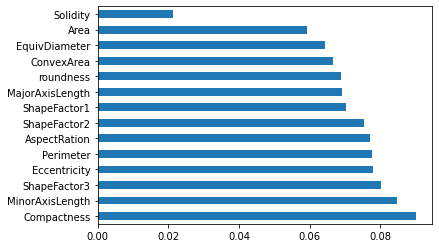

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

### 2.7.3 Heat map

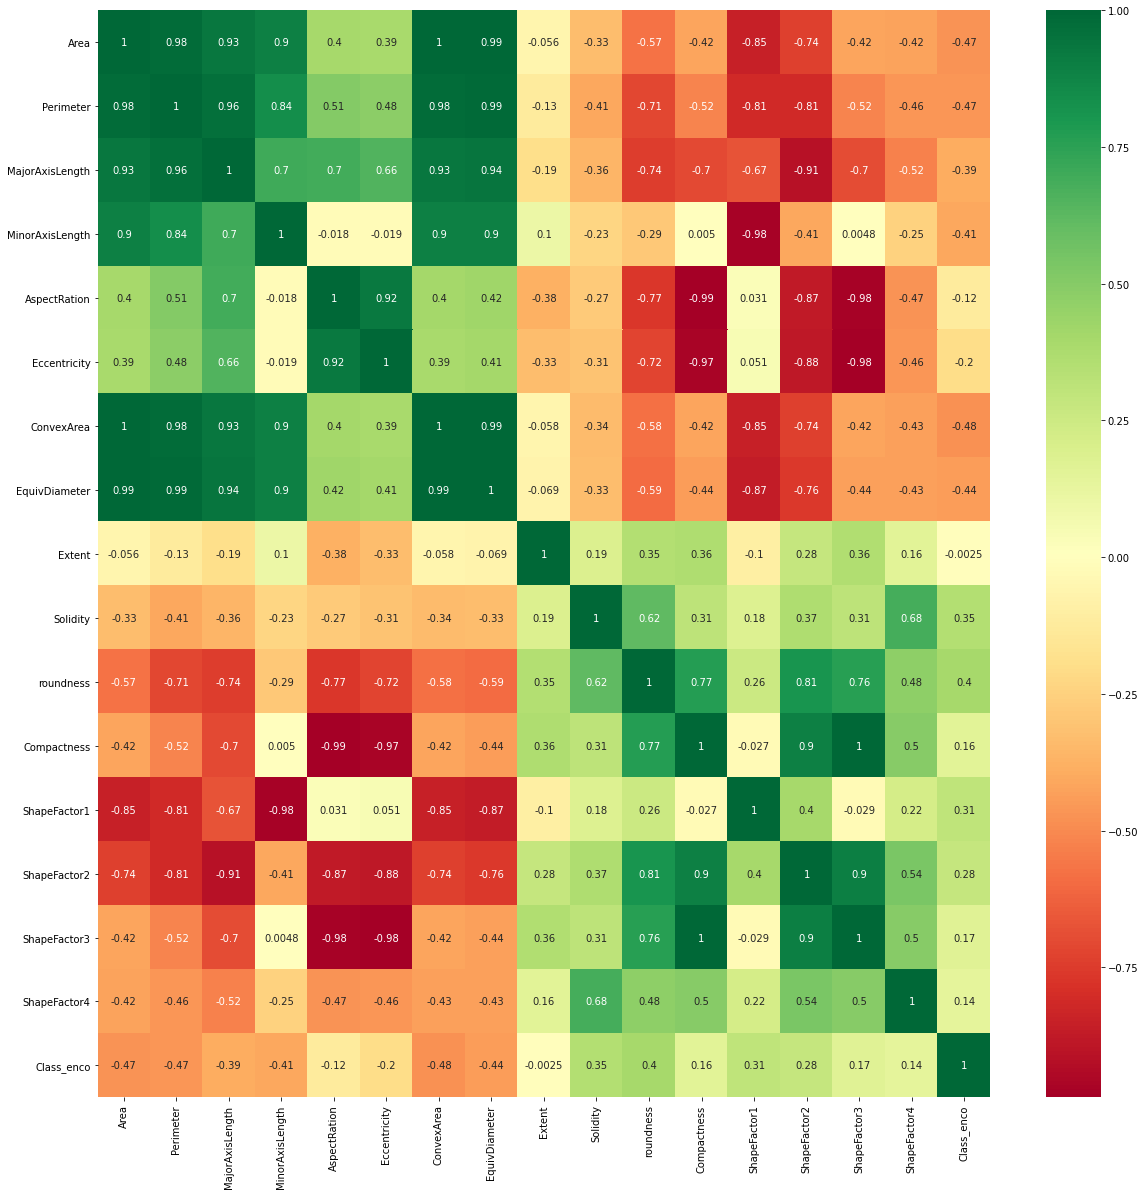

In [ ]:

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Based on the feature scores and heat map, we have selected the features which have higher scores and not co-related among themselves. The selected features are Perimeter, ConvexArea, Roundness, Shapefactor3
and Shapefactor4.

In [ ]:
X_train_final= (X_train[:,[1,6,10,14,15]])
X_test_final= (X_test[:,[1,6,10,14,15]])

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=150, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [ ]:

bag = bag.fit(X_train_final, y_train)
y_train_pred = bag.predict(X_train_final)
y_test_pred = bag.predict(X_test_final)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))


Bagging train/test accuracies 1.000/0.953


After feature selection and training bagging model with selected features we got train accuracy result as 100% and test accuracy result as 95%

# 2.8 Validation Curve


Validation curve: It is a diagnostic tool to show how the accuracy of model changed when the parameter value changed.
we used it for logistic regeression and checked the accuracy of the model while the value of parameter C increased. It provided the highest accuracy for this model at value C is 100 but It is not high enough.


In [ ]:
#Make Pipeline to put multiple processes into one flow 

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=1000))

In [ ]:
# validation curve for logistic regression model


# param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# train_scores, test_scores = validation_curve(
#                 estimator=pipe_lr, 
#                 X=X_train2, 
#                 y=y_train2, 
#                 param_name='logisticregression__C', 
#                 param_range=param_range,cv=10)

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# plt.plot(param_range, train_mean, 
#          color='blue', marker='o', 
#          markersize=5, label='Training accuracy')

# plt.fill_between(param_range, train_mean + train_std,
#                  train_mean - train_std, alpha=0.15,
#                  color='blue')

# plt.plot(param_range, test_mean, 
#          color='green', linestyle='--', 
#          marker='s', markersize=5, 
#          label='Validation accuracy')

# plt.fill_between(param_range, 
#                  test_mean + test_std,
#                  test_mean - test_std, 
#                  alpha=0.15, color='green')

# plt.grid()
# plt.xscale('log')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter C')
# plt.ylabel('Accuracy')
# plt.ylim([0.925, 0.95])
# plt.tight_layout()

# plt.show()



# ![picture](https://drive.google.com/uc?export=download&id=1A_hB0SxnBJGZ76H9uh9Qev--9ouQtF68)


# 2.9 Tunning Hyperparameters with grid Search

Tuning the hyperparameters using Gridsearch: It is a techinique to tune the parameters of the model and compute the accuracy of the model for different combinations of parameters to get the highest accuracy performance and its best combination of parameters.





In [ ]:
#

# pipe_svc = make_pipeline(StandardScaler(),
#                          SVC(random_state=1))

# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# param_grid = [{'svc__C': param_range, 
#                'svc__kernel': ['linear']},
#               {'svc__C': param_range, 
#                'svc__gamma': param_range, 
#                'svc__kernel': ['rbf','linear', 'poly', 'sigmoid', 'precomputed']}]

# gs = GridSearchCV(estimator=pipe_svc, 
#                   param_grid=param_grid, 
#                   scoring='accuracy', 
#                   refit=True,
#                   cv=10,
#                   n_jobs=-1)
# gs = gs.fit(X_train2, y_train2)
# print(gs.best_score_)
# print(gs.best_params_)

In [ ]:
# Based on the gridsearch we got these parameters

pipe_svc = make_pipeline(
                         SVC(random_state=1,C=100.0, gamma= 0.1, kernel='rbf'))
pipe_svc.fit(X_train_std,y_train2)

Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
yhat = pipe_svc.predict(X_val_std)
acc = accuracy_score(y_validation, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.949


we used SVM model to tune the parameters in gridsearch. After about 2 hours computation gridsearch provided the highest accuracy performance with its best combination of parameters.
As we see 95% accuracy is the highest accuracy performance and the combination of parameters are nonlinear kernel , c is 100 and gamma is 0.1.

### Check the true vs predicted value through confusion matrix

In [ ]:
# check how the model predicted the validation dataset 

pipe_svc.fit(X_train_std, y_train2)
y_pred = pipe_svc.predict(X_val_std)
confmat = confusion_matrix(y_true=y_validation, y_pred=y_pred)
print(confmat)

[[539   0  19   0   2   4   4]
 [  0 568   0   0   0   0   0]
 [ 13   0 544   0   4   1   5]
 [  0   0   0 523   2   6  37]
 [  1   0   7   4 545   0  10]
 [  5   0   1   6   0 544  11]
 [  4   0   2  47   5   4 505]]


This model has done better than other models with all features and provided the highest accuracy but we have gotten some miss classified classes as we see from the confusion matrix.

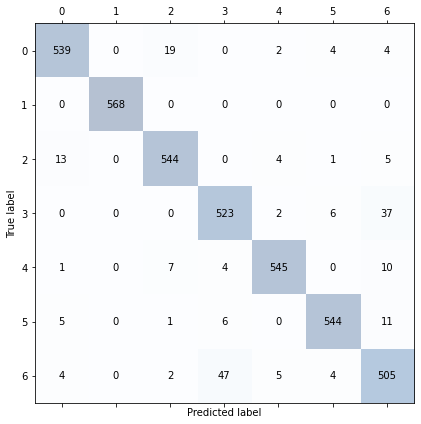

In [ ]:
#Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

# 2.10. keras Tensorflow


 We have used keras with 2 hidden layers, activation function relu for input and hidden layers, softmax for output layer.
 we have used two optimizers Adam and SGD. We got a better result with optimizer SGD.

In [ ]:


model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(16,)))
model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 10,583
Trainable params: 10,583
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 
model.compile(optimizer='sgd',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model.fit(X_train_std, y_train2,epochs=17, batch_size=10, verbose=1)  

Epoch 1/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.9512 - accuracy: 0.6677
Epoch 2/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1917 - accuracy: 0.9400
Epoch 3/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1674 - accuracy: 0.9408
Epoch 4/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1680 - accuracy: 0.9417
Epoch 5/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1619 - accuracy: 0.9431
Epoch 6/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1555 - accuracy: 0.9454
Epoch 7/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1504 - accuracy: 0.9431
Epoch 8/17
1589/1589 [==============================] - 2s 997us/step - loss: 0.1489 - accuracy: 0.9465
Epoch 9/17
1589/1589 [==============================] - 2s 1ms/step - loss: 0.1434 - accuracy: 0.9501
Epoch 10/17
1589/1589 [==============================] - 2s 1000us/step - loss: 

As we can see above the model provided the highest accuracy.

 Compiling the keras model and fitting it every time we run the code consumes execution time, but when the saved model was loaded there was change in accuracy which is less, so we thought of going without the saved model and runnning by less epochs.

In [ ]:

# model.save('my_model_adam.h5') 

In [ ]:
# # Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_model_adam.h5')

# # Show the model architecture
# new_model.summary()

In [ ]:
#new_model.get_weights

In [ ]:
#new_model.optimizer

In [ ]:
# loss, acc = new_model.evaluate(X_val_std, y_validation, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
# loss, acc = new_model_01.evaluate(X_val_std, y_validation, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# 3. Model Evaluation

We trained several models and compared their accuracies performance, then the next step was choosing one model and evaluating the model with unseen data. At the bigning, we splitted the dataset into three parts, we used the train and validation dataset to train different models to choose the best model with the highest accuracy and the test dataset to evaluate the model.So we evaluted the chosen model using the test data.
As we can see below the accuracy is high for the test dataset.

In [ ]:


y_pred = model.predict(X_test_std)
y_pred_classes = [np.argmax(element) for element in y_pred]
target_names=list(class_le.inverse_transform(y.unique()))

print("Classification Report: \n", classification_report(y_test, y_pred_classes,target_names = target_names))

# This report shows the evaluation of different metrics of this model for each class 

Classification Report: 
               precision    recall  f1-score   support

       SEKER       0.97      0.95      0.96       709
    BARBUNYA       1.00      1.00      1.00       709
      BOMBAY       0.94      0.97      0.95       709
        CALI       0.94      0.84      0.88       709
       HOROZ       0.97      0.96      0.97       710
        SIRA       0.98      0.96      0.97       710
    DERMASON       0.82      0.93      0.87       709

    accuracy                           0.94      4965
   macro avg       0.95      0.94      0.94      4965
weighted avg       0.95      0.94      0.94      4965



# 4. Conclusion

 We implemented several machine learning algorithms and techniques to classify the beans into 7 categories.
Among the models we used Bagging, SVM nonlinear kernel and keras TensorFlow  models provided the highest accuracy  more than 95%.
 Besides, Keras provided the highest accuracy for unseen(test) data with 95%.
 The accuracy would be increased if suture axis and texture of beans were considered.
